## Linear Regression



### Causation versus Correlation



 Back in my home country, and before the hippy movement changed our culture, kids, who were curious about where the babies come from, were told that they are brought by the stork (a large bird, see Fig.[fig:storksa](fig:storksa)). Storks were indeed a common sight in rural areas, and large enough to sell this story to a 3-year-old.

![img](Ringedwhitestork.jpg "The Stork. Image by Soloneying, Wikimedia Downloaded Nov 22, 2019.")

Sadly, as grown-up scientists with a penchant for critical thinking, we want to know if there is data to support this idea. Specifically, we should see a good correlation between the number of storks and the number of babies. Low and behold, these two variables actually correlate in a statistically significant way. Countries with larger stork populations have higher birthrates.  Since both variables increase together, this is called a positive correlation. See Fig. [4](#orgb447592)

![img](./stork_new.png "The birthrate and the number of stork pairs correlate in a statistically significant way. This analysis suggests that each stork pair delivers about 29 human babies, and that about 225 thousand babies were born otherwise. Data after Matthews 2000.")

Now, does this prove that the storks deliver the babies? Obviously (or so we think) not. Just because two observable quantities correlate does in no way imply that one is the cause of the other. The more likely explanation is that both variables are affected by a common process (i.e., industrialization).

It is a common mistake to confuse correlation with causation. Another good example is to correlate drinking with heart attacks. This surely will correlate, but the story is more complex. Are there, e.g., patterns like drinkers tend to do less exercise than non-drinkers? So even if you have a good hypothesis why two variables are correlated, the correlation itself proves nothing.

Irrespective of a causal relationship, we can express the correlation between two datasets as the Pearson Product Moment Correlation Coefficient (PPMC, typically called `r`) to describe the strength and direction of the relationship between two variables.   The PPMCC (lower case r) varies between +1 (perfect positive correlation) and -1 (perfect negative or inverse correlation). Correlations are described as weak if they are between +0.3 and -0.3, strong if they are greater than +0.7 or less than -0.7. Note, that correlation analysis makes no assumptions about the functional form between `y` (dependent variable) and `x` (independent variable). In other words, the PPMC says nothing about whether the correlation is linear, logarithmic, exponential etc.

We can use the `corr()` method of the pandas series object to calculate the PPMCC



In [1]:
import pandas as pd  # inport pandas as pd
import pathlib as pl

fn: str = "storks_vs_birth_rate.csv"  # file name
cwd: pl.Path = pl.Path.cwd()
fqfn: pl.Path = pl.Path(f"{cwd}/{fn}")

if not fqfn.exists():
    raise FileNotFoundError(f"Cannot find file {fqfn}")

df: pd.DataFrame = pd.read_csv(fn)  # read data
df.columns = ["Babies", "Storks"]  # replace colum names 
b: pd.Series = df["Babies"]
s: pd.Series = df["Storks"]

print(f" r = {s.corr(b):.2f}")

So we can confirm that the number of babies and storks correlate.



### Understanding the results of a linear regression analysis



Linear regression analysis takes correlation analysis one step further and determines how well a linear function (e.g., a straight line) can describe the relation between x and y.  The equation of a straight line `y = mx +b` is fitted to the scatter of data by changing `a` and `m` in such a way that the difference between the measured data and the model prediction is minimized.

The Coefficient of Determination or r<sup>2</sup> expresses how well a sloping straight line can explain the correlation between the dependent (y) and a single independent (x) variable. In the above figure, r<sup>2</sup> = 0.38, which means that 38% of the new-born babies could be explained by a linear correlation with the number of storks.

In many cases, more than one independent variable is needed to explain the scatter in the data. In this case, Multiple Linear Regression is used where `y = x1 + x2 + x3….xn + b`. From this analysis (i.e. simultaneous solving for a system of linear equations – remember your Linear Algebra course!) the Multiple Coefficient of Determination (R<sup>2</sup>) is used to express the amount of explained variation in `y` by a combination of independent variables. By default, many programs use the R<sup>2</sup> number even when there is only one independent variable. This can be misleading as capital R<sup>2</sup> should be reserved for analyses that involve multiple independent variables.

From a user perspective, we are interested to understand how good the
model is, and how to interpret the key indicators of a given
regression model:

-   **r<sup>2</sup>:** or the coefficient of determination.  This value is in the range from zero to one and expresses how much of the observed variance  in the data is explained by the regression model. So a value of r<sup>2</sup>=0.7 indicates that 70% of the variance is explained by the model, and that 30% of the variance is explained by other processes which are not captured by the linear model (e.g., measurements errors, or some non-linear effect affecting `x` and `y`). In Fig. [BROKEN LINK: fig:storks] 38% of the variance in the birthrate can be explained by the increase in stork pairs.
-   **p:** When you do a linear regression, you state the hypothesis that `y` depends on `x` and that they are linked by a linear equation. If you test a hypothesis, you however also have to test the so-called **null-hypothesis**, which in this case would  state that `y` is  unrelated to `x`. The p-value expresses the likelihood that the null-hypothesis is true. So a p-value of 0.1 indicates a 10% chance that your data does not correlate. A p-value of 0.01, indicates a 1% chance that your data is not correlated. Typically, we can reject the null-hypothesis if `p < 0.05`, in other words, we are 95% sure the null hypothesis is wrong. In Fig. [BROKEN LINK: fig:storks], we are 99.2% sure the null hypothesis is wrong. Note that there is not always a simple relationship between r<sup>2</sup> and p.



### The statsmodel library



 Python's success rests to a considerable degree on the myriad of third party libraries which, unlike MatLab, are typically free to use. In the following, we will use the "statsmodel" library, but there are plenty of other statistical libraries we could use as well.

The statsmodel library provides a few different interfaces. Here we will use the formula interface, which is similar to the R-formula syntax. However, not all statsmodel functions are available through this interface (yet?). First, we import the needed libraries:



In [1]:
import pandas as pd  # import pandas as pd
import pathlib as pl

fn: str = "storks_vs_birth_rate.csv"  # file name
cwd: pl.Path = pl.Path.cwd()
fqfn: pl.Path = pl.Path(f"{cwd}/{fn}")
if not fqfn.exists():  # check if the file is actually there
    raise FileNotFoundError(f"Cannot find file {fqfn}")

df: pd.DataFrame = pd.read_csv(fn)  # read data
df.columns = ["Babies", "Storks"]  # replace colum names
display(df.head())  # test that all went well

|   | Babies | Storks |
|---+--------+--------|
| 0 |    118 |      1 |
| 1 |    188 |      4 |
| 2 |    551 |      5 |
| 3 |     59 |      9 |
| 4 |     83 |    100 |

Before we perform a regression analysis, we must test if the data follows a normal distribution. There are a variety of tests to check for normality, but here we will simply use a histogram plot which either shows a bell curve distribution or not 



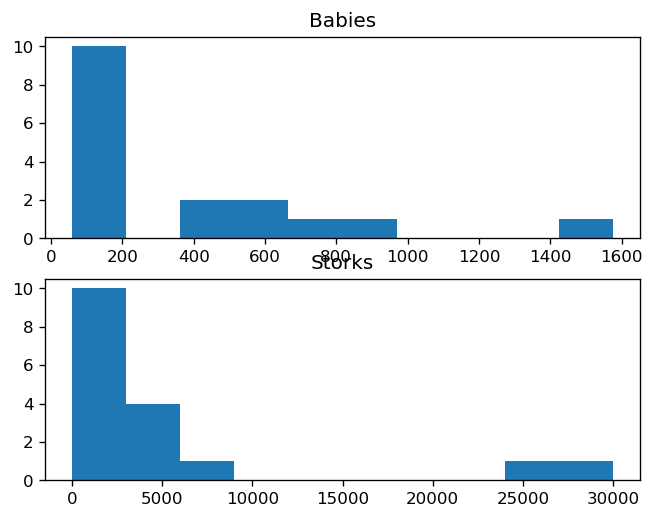

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax1: plt.Axes
ax2: plt.Axes

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)  #
ax1.hist(
    df.iloc[:, 0],
)
ax2.hist(df.iloc[:, 1])
ax1.set_title("Babies")
ax2.set_title("Storks")
plt.show()

As you can see from the histogram, our data shows anything but a normal distribution! We will use it anyway since it is a fun dataset. However, the above test is crucial if you ever want to do a real regression analysis!

For the regression model, we want to analyze whether the number of storks predict the number of babies. In other words, does the birth rate depend on the number of storks? For this, we need to define a statistical model, and test whether the model predictions will fit the data:

-   The gory details of this procedure are beyond the scope of this course - if you have not yet taken a stats class, I do recommend doing so!
-   There are many ways of doing this. Here we use an approach which is common in `R` (for more details, see [https://www.statsmodels.org/dev/example_formulas.html](https://www.statsmodels.org/dev/example_formulas.html))

As of March 2024, there is no type hinting support for the statsmodel library.  However, to distinguish between the various statsmodel object types, I use the following hints:



In [1]:
# smf.ols   ordinary least square model object
# smf.ols.fit  model results object

See below how this is used in code.

After importing the data, we now create a statistical model on line 16 in the code below.  Pay attention to how the model is specified with the formula `"Babies ~ Storks`, which states that the number of Babies should depend on the number of storks. These names must correspond to the variable names in the data frame `df`! So it is a good ideas to use the `columns()` method to set the column names to single word like "Babies" instead of "Birthrate per year".

Once the model is defined, we request to fit the model against the data (line 17) The results of the `fit()` method will be stored in the `results` variable.  Line 18, then invokes the `summary()` method of the results object.



In [1]:
import statsmodels.formula.api as smf
import pandas as pd  # import pandas as pd
import pathlib as pl

fn: str = "storks_vs_birth_rate.csv"  # file name
cwd: pl.Path = pl.Path.cwd()
fqfn: pl.Path = pl.Path(f"{cwd}/{fn}")
if not fqfn.exists():  # check if the file is actually there
    raise FileNotFoundError(f"Cannot find file {fqfn}")

df: pd.DataFrame = pd.read_csv(fn)  # read data
df.columns = ["Babies", "Storks"]  # replace colum names

model: smf.ols = smf.ols(formula="Babies ~ Storks", data=df)
results: model.fit = model.fit()  # fit the model to the data
display(results.summary())  # print the results of the analysis

/home/uliw/mambaforge/envs/py311/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
| Dep. Variable:    | Babies           | R-squared:          |   0.385 |
| Model:            | OLS              | Adj. R-squared:     |   0.344 |
| Method:           | Least Squares    | F-statistic:        |   9.380 |
| Date:             | Mon, 18 Mar 2024 | Prob (F-statistic): | 0.00790 |
| Time:             | 10:12:12         | Log-Likelihood:     | -121.75 |
| No. Observations: | 17               | AIC:                |   247.5 |
| Df Residuals:     | 15               | BIC:                |   249.2 |
| Df Model:         | 1                |                     |         |
| Covariance Type:  | nonrobust        |                     |         |
#+caption: OLS Regression Results

|           |     coef | std err |     t |    P> |      t |         | [0

Plenty of information here, probably more than you asked for. Let's tease out the important ones:

-   The first line states that `Babies` is the dependent variable. This is useful and will help you to catch errors in your model definition.
-   The second line confirms that this is an ordinary least squares model
-   Then, there are also a couple of warnings, indicating that your data quality may be less than excellent. But we knew this already from testing whether the data is normal distributed or not.

If you compare the output with Figure [fig:storks](fig:storks), you can see that r<sup>2</sup> value is called "R-squared", the p-value is called "Prob (F-statistic)", the y-intercept is the first value in the "Intercept" row, the slope is the first value in the "Storks" row. You can also extract these parameters from the model results object like this:



In [1]:
# retrieve values from the model results
slope   :float = results.params[1]  # the slope
y_0      :float = results.params[0]  # the y-intercept
r_square :float = results.rsquared   # r_square
p_value  :float = results.pvalues[1] # the p_value

### Adding the regression line and confidence intervals



The r<sup>2</sup> and p-value give us some indication of how well our regression model performs. However, we can add further information to our graph:

-   The line which represents the regression model
-   The confidence intervals that indicate the confidence we have in our
    regression model.
-   The confidence intervals that indicate the confidence we have in
    the predictions we make based on our regression model



#### Accessing the confidence interval data



It is not easy to find out how to access these parameters in the statslib library. So best to keep this code snippet in your template collection. Bottom line is, we will use the `summary_table()` function provided by the `statsmodels.stats.outliers_influence` module. We can then feed the `results` object of the regression analysis to this function, and it will return all sorts of data (most of which we can ignore). Note that the `alpha` keyword specifies the significance level for the confidence intervals we aim to retrieve. It is customary to provide this number as 1-significance (e.g., &alpha;=0.05 implies 1-&alpha; = 95%).



In [1]:
import numpy as np
import numpy.typing as npt
from statsmodels.stats.outliers_influence import summary_table

# variable types for the return values from summary_table
NDArrayFloat = npt.NDArray[np.float64]
st: summary_table  # table with results that can be printed
data: list  # calculated measures and statistics for the table
ss2: list[str]  # column_names for table (Note: rows of table are observations)

sig: float = 0.05  # = 1 - sig > 0.95 = 95% significance
st, data, ss2 = summary_table(results, alpha=0.05)

# extract the data for predicted values and confidence intervals
fitted_values: NDArrayFloat  = data[:, 2]  # the regression line

# confidence intervals for the model
model_ci_low: NDArrayFloat   # lower confidence limits
model_ci_upp: NDArrayFloat   # upper confidence limits
model_ci_low, model_ci_upp = data[:, 4:6].T  # don't ask....

# confidence intervals for the model predictions
predict_mean_ci_low: NDArrayFloat 
predict_mean_ci_upp: NDArrayFloat 
predict_mean_ci_low, predict_mean_ci_upp = data[:, 6:8].T

#### Plotting the confidence interval data



The upper and lower confidence boundaries describe the upper and lower boundaries of an area. We can either plot these boundaries as a line plot or as a shaded area.  Matplotlib provides the `fill_between` method to shade the area between two lines:



In [1]:
# ax.fill_between(storks, model_ci_low, model_ci_up, alpha=0.1, color="C1")

Note the use of the `alpha` keyword. This has nothing to do with the alpha which is used in statistics. Rather, it describes the transparency of the object you are drawing. If you set it to one (the default), the object will be fully opaque. If you set it to zero, it will be fully transparent (so you won't see it).  See the code below for an actual example.



### Creating the Stork Figure



Now let's put it all together. Note that when we draw the figure, it matters whether we draw the confidence intervals first or last. Change the order in the code below, to see the difference.



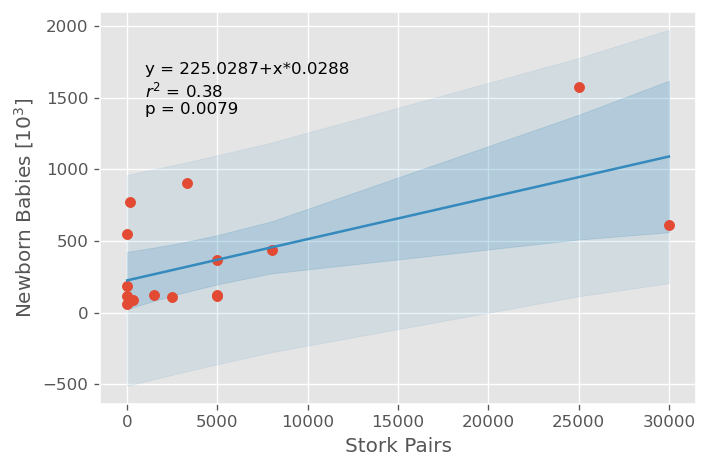

In [1]:
import numpy as np
import numpy.typing as npt
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as pl
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table

fn: str = "storks_vs_birth_rate.csv"  # file name
cwd: pl.Path = pl.Path.cwd()
fqfn: pl.Path = pl.Path(f"{cwd}/{fn}")
if not fqfn.exists():  # check if the file is actually there
    raise FileNotFoundError(f"Cannot find file {fqfn}")

df: pd.DataFrame = pd.read_csv(fn)  # read data
df.columns = ["Babies", "Storks"]  # replace colum names
storks: pd.Series = df["Storks"]
babies: pd.Series = df["Babies"]

# ------ create linear regression model ------
model: smf.ols = smf.ols(formula="Babies ~ Storks", data=df)
results: model.fit = model.fit()  # fit the model to the data

# ------ extract model parameters
slope: float = results.params["Storks"]  # the slope = name of y
y_0: float = results.params["Intercept"]  # the y-intercept
r_square: float = results.rsquared  # r_square
p_value: float = results.pvalues["Storks"]  # the p_value for y
ds: str = (
    f"y = {y_0:1.4f}+x*{slope:1.4f}\n"
    f"$r^2$ = {r_square:1.2f}\n"
    f"p = {p_value:1.4f}"
)

# ------ extract confidence intervals ------
NDArrayFloat = npt.NDArray[np.float64]
st: summary_table  # table with results that can be printed
data: NDArrayFloat  # calculated measures and statistics for the table
ss2: list[str]  # column_names for table (Note: rows of table are observations)
model_ci_low: NDArrayFloat  # lower confidence value
model_ci_up: NDArrayFloat  # upper confidence number
predict_mean_ci_low: NDArrayFloat  # lower prediction
predict_mean_ci_up: NDArrayFloat  # upper prediction

# get data
sig: float = 0.05  # = 1 - sig > 0.95 = 95% significance
st, data, ss2 = summary_table(results, alpha=sig)
fitted_values: NDArrayFloat = data[:, 2]
model_ci_low, model_ci_up = data[:, 4:6].T  #
predict_mean_ci_low, predict_mean_ci_up = data[:, 6:8].T

# ------ create plot ------
fig: plt.Figure  # this variable  will hold the canvas object
ax: plt.Axes  # this variable will hold the axis object
fig, ax = plt.subplots()  # create canvas and axis objects

# plot confidence intervals first
ax.fill_between(storks, predict_mean_ci_low, predict_mean_ci_up, alpha=0.1, color="C1")
ax.fill_between(storks, model_ci_low, model_ci_up, alpha=0.2, color="C1")
# add data points
ax.scatter(storks, babies, color="C0")
# regression line
ax.plot(storks, fitted_values, color="C1")
# plot options and annotations
plt.style.use("ggplot")
fig.set_size_inches(6, 4)
fig.set_dpi(120)
ax.text(1000, 1750, ds, verticalalignment="top")
ax.set_xlabel("Stork Pairs")
ax.set_ylabel("Newborn Babies [$10^3$]")
fig.set_tight_layout("tight")
fig.savefig("stork_new.png")
plt.show()

The code above is quite lengthy, especially given the fact that you can do a regression analysis with a few clicks in excel. On the other hand, if you re-arrange the code a little bit, and use generic variables, you can create a code template where you only specify a few key parameters at the beginning of the code, and then you can generate a much more meaningful regression analysis with a few keystrokes:



In [1]:
""" Description:
    Author:
    Date:
"""
# ----------- third party library imports ------------------
import pandas as pd  # inport pandas as pd
import matplotlib.pyplot as plt
import pathlib as pl
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table

# ----------- user serviceable pararameters
data_file: str = ""  # csv file name
figure_name: str = ""  # figure name

independent_variable: str = ""  # must match col name
dependent_variable: str = ""  # must match col name

x_axis_label: str = ""
y_axis_label: str = ""
size_x: number = 6  # size in inches
size_y: number = 4  # size in inches

confidence_level: float = 0.05  # 1 - alpha in %

# ----------- main program ---------------------------------
# --- variable declarations

# --- code starts here

### References



-   Robert Matthews, Storks Devilver Babies (p = 0.008), Teaching
    Statistics 22:2, p 36-38, 2000,
    [https://doi.org/10.1111/1467-9639.00013](https://doi.org/10.1111/1467-9639.00013)

